# Building a Mosaic with Montage

In [1]:
import os
import sys
import shutil

from MontagePy.main    import *
from MontagePy.archive import *

from IPython.display import Image

In [2]:
# init
os.makedirs('input')
os.makedirs('projected')
os.makedirs('diffs')
os.makedirs('corrected')

In [3]:
# Download
location  = "M 17"
size      = 0.25
dataset   = "2MASS J"
workdir   = "Messier017"

# Create the FITS header for the mosaic.
rtn = mHdr(location, size, size, 'region.hdr')
print("mHdr:                " + str(rtn))

# Retrieve archive images covering the region then scan 
# the images for their coverage metadata.
rtn = mArchiveDownload(dataset, location, size, 'input')
print("mArchiveDownload:    " + str(rtn))

mHdr:                {'status': '0', 'count': 16}
mArchiveDownload:    {'status': '0', 'count': 8}


In [4]:
# Reproject
for root, dirs, files in os.walk('input'):
    for filename in files:
        print(filename)
        input_path = os.path.join(root, filename)
        rtn = mProjectPP(input_path, 'projected/' + filename, 'region.hdr')
        print("mProjectP:           " + str(rtn))

2mass-atlas-990502s-j1350080.fits
mProjectPP: {'status': '0', 'time': 0.0}
2mass-atlas-990502s-j1350092.fits
mProjectPP: {'status': '0', 'time': 0.0}
2mass-atlas-990502s-j1420186.fits
mProjectPP: {'status': '0', 'time': 1.0}
2mass-atlas-990502s-j1420198.fits
mProjectPP: {'status': '0', 'time': 1.0}
2mass-atlas-990502s-j1430080.fits
mProjectPP: {'status': '0', 'time': 0.0}
2mass-atlas-990502s-j1430092.fits
mProjectPP: {'status': '0', 'time': 1.0}
2mass-atlas-990502s-j1440186.fits
mProjectPP: {'status': '0', 'time': 0.0}
2mass-atlas-990502s-j1440198.fits
mProjectPP: {'status': '0', 'time': 1.0}


In [5]:
mImgtbl("projected", "pimages.tbl")
print("mImgtbl (projected): " + str(rtn))

mImgtbl (projected): {'status': '0', 'time': 1.0}


In [6]:
# Determine the overlaps between images (for background modeling).
rtn = mOverlaps("pimages.tbl", "diffs.tbl")
print("mOverlaps:           " + str(rtn))

mOverlaps:           {'status': '0', 'count': 13}


In [7]:
# Generate difference images and fit them.
rtn = mDiffFitExec("projected", "diffs.tbl", "region.hdr", "diffs", "fits.tbl")
print("mDiffFitExec:        " + str(rtn))

mDiffFitExec:        {'status': '0', 'count': 13, 'diff_failed': 0, 'fit_failed': 0, 'warning': 0}


In [8]:
# Model the background corrections.
rtn = mBgModel("pimages.tbl", "fits.tbl", "corrections.tbl")
print("mBgModel:            " + str(rtn))

# Extract parameters which will be used by mBackground
a, b, c = [], [], []
with open('corrections.tbl', 'r') as f:
    s = f.readlines()
for i in range(1, len(s)):
    tmp = s[i].split()
    a.append(eval(tmp[1]))
    b.append(eval(tmp[2]))
    c.append(eval(tmp[3]))

mBgModel:            {'status': '0'}


In [9]:
# Background correct the projected images.
l = 0
for root, dirs, files in os.walk('input'):
    for filename in files:
        print(filename)
        rtn = mBackground('projected/' + filename, 'corrected/' + filename, a[l], b[l], c[l])
        l += 1
        print('mBackground:', str(rtn))

2mass-atlas-990502s-j1350080.fits
mBackground: {'status': '0', 'time': 0.0}
2mass-atlas-990502s-j1350092.fits
mBackground: {'status': '0', 'time': 1.0}
2mass-atlas-990502s-j1420186.fits
mBackground: {'status': '0', 'time': 0.0}
2mass-atlas-990502s-j1420198.fits
mBackground: {'status': '0', 'time': 0.0}
2mass-atlas-990502s-j1430080.fits
mBackground: {'status': '0', 'time': 0.0}
2mass-atlas-990502s-j1430092.fits
mBackground: {'status': '0', 'time': 0.0}
2mass-atlas-990502s-j1440186.fits
mBackground: {'status': '0', 'time': 0.0}
2mass-atlas-990502s-j1440198.fits
mBackground: {'status': '0', 'time': 0.0}


In [10]:
rtn = mImgtbl("corrected", "cimages.tbl")
print("mImgtbl (corrected): " + str(rtn))

mImgtbl (corrected): {'status': '0', 'count': 8, 'badfits': 0, 'badwcs': 0}


In [11]:
# Coadd the background-corrected, projected images.
rtn = mAdd("corrected", "cimages.tbl", "region.hdr", "mosaic.fits")
print("mAdd:                " + str(rtn))

mAdd:                {'status': '0', 'time': 0.0}


mViewer:             {'status': '0', 'type': b'grayscale', 'nx': 901, 'ny': 900, 'grayminval': 133.1141190725878, 'grayminpercent': 0.0, 'grayminsigma': -2.0, 'graymaxval': 10186.132664087554, 'graymaxpercent': 100.0, 'graymaxsigma': 834.7670716218402, 'blueminval': 0.0, 'blueminpercent': 0.0, 'blueminsigma': 0.0, 'bluemaxval': 0.0, 'bluemaxpercent': 0.0, 'bluemaxsigma': 0.0, 'greenminval': 0.0, 'greenminpercent': 0.0, 'greenminsigma': 0.0, 'greenmaxval': 0.0, 'greenmaxpercent': 0.0, 'greenmaxsigma': 0.0, 'redminval': 0.0, 'redminpercent': 0.0, 'redminsigma': 0.0, 'redmaxval': 0.0, 'redmaxpercent': 0.0, 'redmaxsigma': 0.0, 'graydatamin': 145.68560367526635, 'graydatamax': 10186.132664087554, 'bdatamin': 0.0, 'bdatamax': 0.0, 'gdatamin': 0.0, 'gdatamax': 0.0, 'rdatamin': 0.0, 'rdatamax': 0.0, 'flipX': 0, 'flipY': 1, 'colortable': 1, 'bunit': b''}


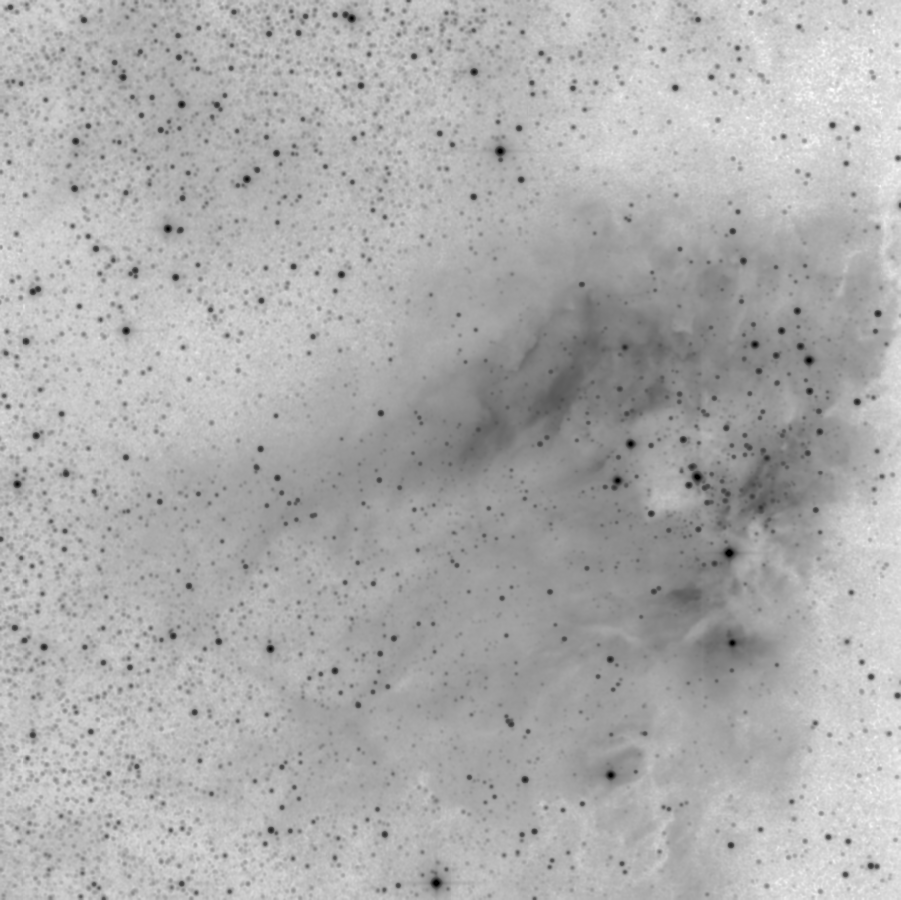

In [12]:
# Make a PNG rendering of the data and display it.
rtn = mViewer("-ct 1 -gray mosaic.fits -2s max gaussian-log -out mosaic.png", "", mode=2)
print("mViewer:             " + str(rtn))


Image(filename='mosaic.png')